### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

去重前的数据量: 20358
去重后的数据量: 19779

剩余的缺失值情况:
blog    11263
dtype: int64

`created_at` 和 `updated_at` 列的数据类型:
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
dtype: object


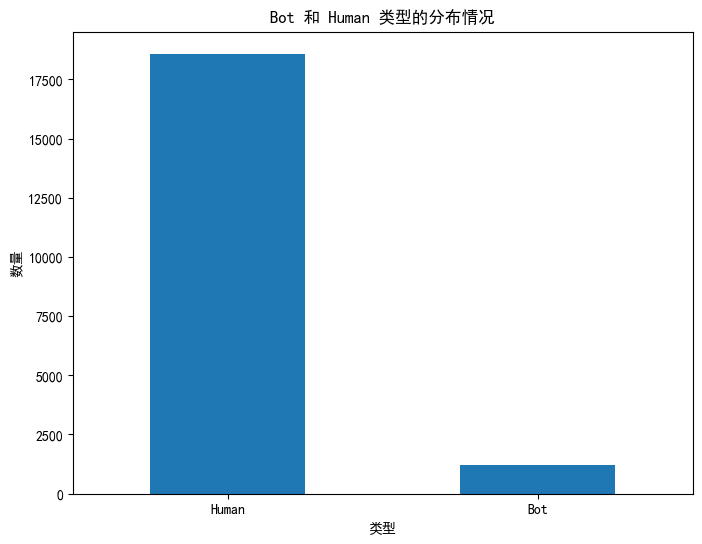

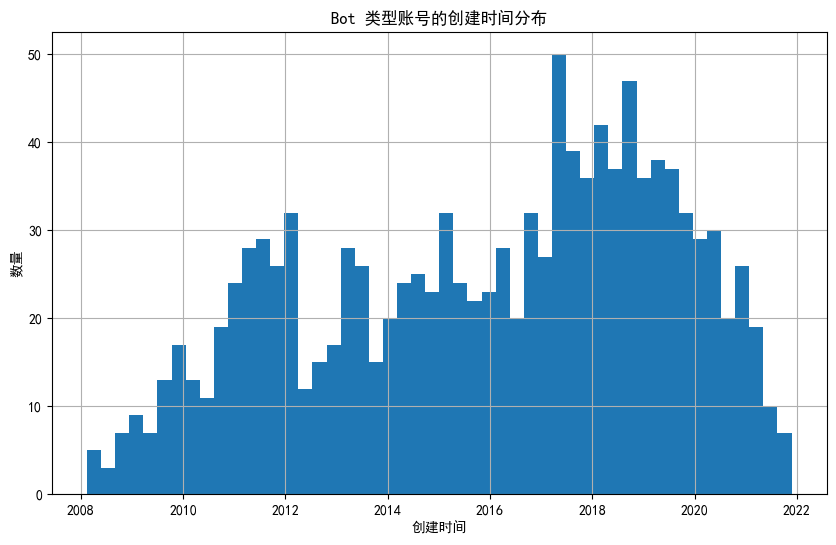

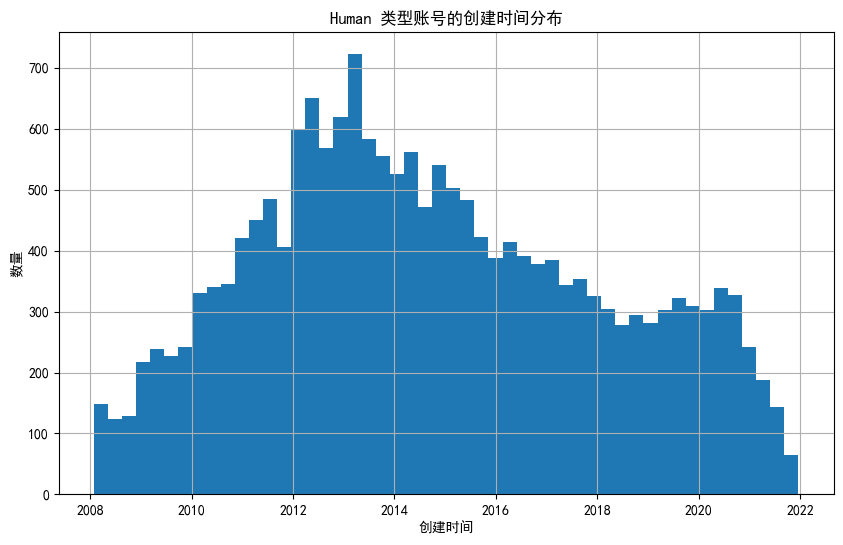

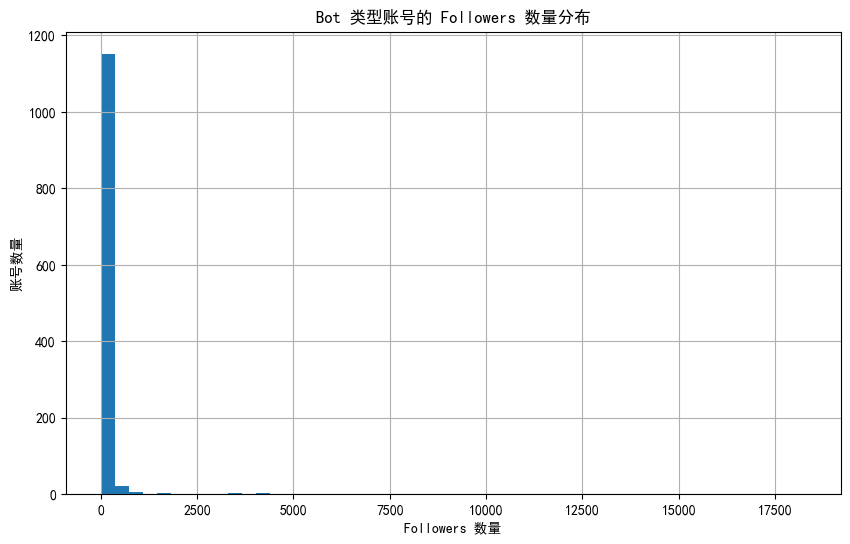

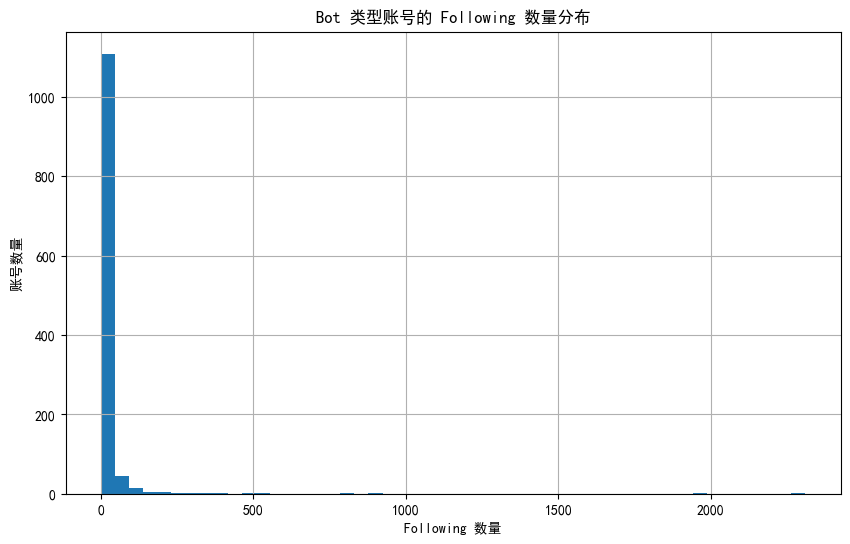

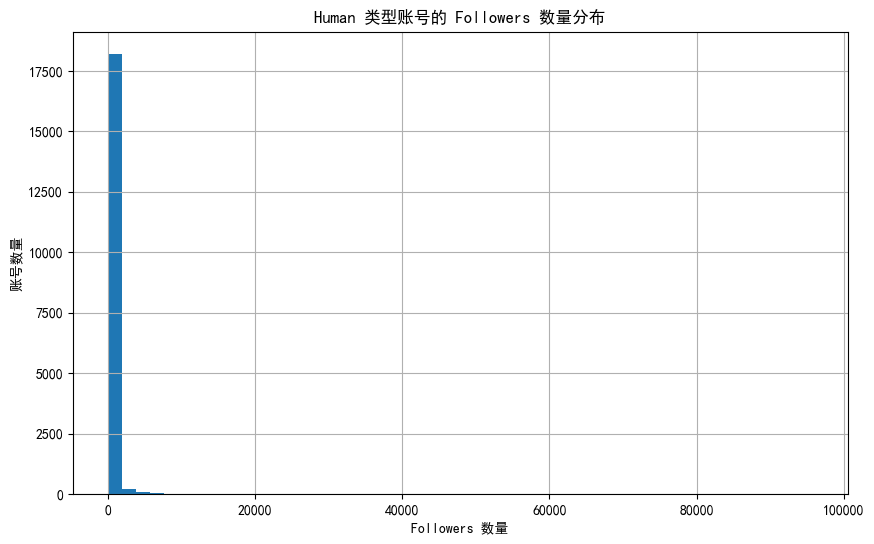

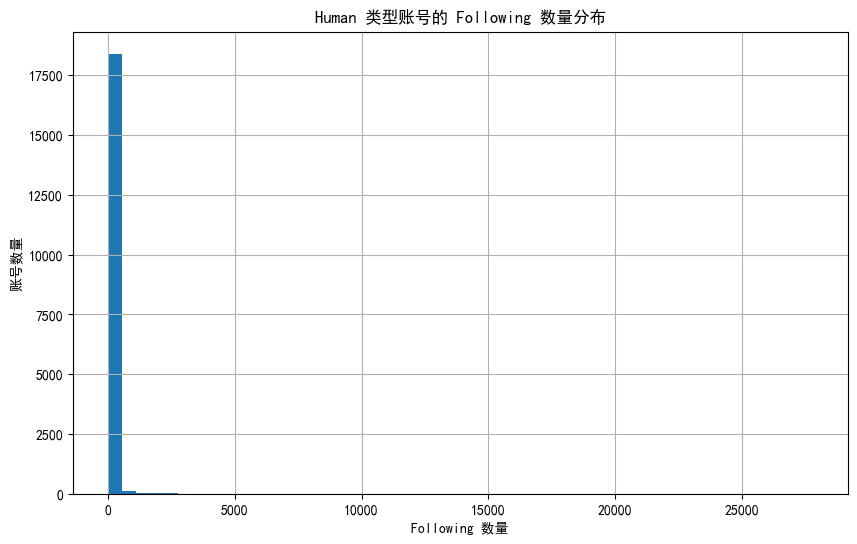

In [3]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

# 删除重复数据并输出去重前后的数据量
initial_count = data.shape[0]
data = data.drop_duplicates()
final_count = data.shape[0]
print("去重前的数据量:", initial_count)
print("去重后的数据量:", final_count)

# 删除 `gravatar_id` 列（完全为空，无需保留）
data = data.drop(columns=['gravatar_id'])

# 检查并处理缺失值
# 将 `company`, `location`, `email`, `hireable`, `twitter_username` 列转换为布尔类型，表示这些字段是否有值
data['company'] = data['company'].notnull()
data['location'] = data['location'].notnull()
data['email'] = data['email'].notnull()
data['hireable'] = data['hireable'].notnull()
data['twitter_username'] = data['twitter_username'].notnull()

# 用空字符串填充文本数据中的缺失值
text_columns = ['name', 'bio']
data[text_columns] = data[text_columns].fillna('')

# 检查是否还有缺失值
remaining_missing_values = data.isnull().sum()
print("\n剩余的缺失值情况:")
print(remaining_missing_values[remaining_missing_values > 0])

# 将 `created_at` 和 `updated_at` 列转换为时间戳格式
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# 检查转换后的数据类型
print("\n`created_at` 和 `updated_at` 列的数据类型:")
print(data.dtypes[['created_at', 'updated_at']])

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中文字体，指定SimHei字体来避免中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 可视化 `bot` 和 `human` 类型的分布
type_counts = data['label'].value_counts()
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar')
plt.title('Bot 和 Human 类型的分布情况')
plt.xlabel('类型')
plt.ylabel('数量')
plt.xticks(rotation=0)
plt.show()

# 筛选出 `bot` 类型的数据
bot_data = data[data['label'] == 'Bot']

# 绘制 `created_at` 的分布直方图
plt.figure(figsize=(10, 6))
bot_data['created_at'].hist(bins=50)
plt.title('Bot 类型账号的创建时间分布')
plt.xlabel('创建时间')
plt.ylabel('数量')
plt.show()

# 筛选出 `human` 类型的数据
human_data = data[data['label'] == 'Human']

# 绘制 `created_at` 的分布直方图
plt.figure(figsize=(10, 6))
human_data['created_at'].hist(bins=50)
plt.title('Human 类型账号的创建时间分布')
plt.xlabel('创建时间')
plt.ylabel('数量')
plt.show()

# 绘制 `followers` 分布
plt.figure(figsize=(10, 6))
bot_data['followers'].hist(bins=50)
plt.title('Bot 类型账号的 Followers 数量分布')
plt.xlabel('Followers 数量')
plt.ylabel('账号数量')
plt.show()

# 绘制 `following` 分布
plt.figure(figsize=(10, 6))
bot_data['following'].hist(bins=50)
plt.title('Bot 类型账号的 Following 数量分布')
plt.xlabel('Following 数量')
plt.ylabel('账号数量')
plt.show()

# 绘制 `followers` 分布
plt.figure(figsize=(10, 6))
human_data['followers'].hist(bins=50)
plt.title('Human 类型账号的 Followers 数量分布')
plt.xlabel('Followers 数量')
plt.ylabel('账号数量')
plt.show()

# 绘制 `following` 分布
plt.figure(figsize=(10, 6))
human_data['following'].hist(bins=50)
plt.title('Human 类型账号的 Following 数量分布')
plt.xlabel('Following 数量')
plt.ylabel('账号数量')
plt.show()

